In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("C:/Users/DELL/ML_Algorithms_project_ICTA/humidity-prediction/dataset/weather-history.csv")

In [3]:
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


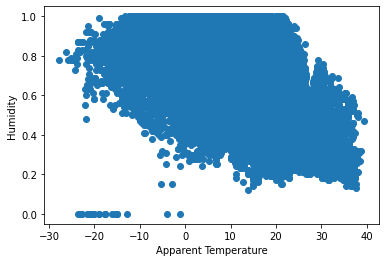

In [4]:
import matplotlib.pyplot as plt
plt.scatter(data['Apparent Temperature (C)'], data['Humidity'])
plt.xlabel('Apparent Temperature')
plt.ylabel('Humidity')
plt.show()


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data['Apparent Temperature (C)'], data['Humidity'], test_size=0.2)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.values.reshape(-1, 1))
X_test = scaler.transform(X_test.values.reshape(-1, 1))


In [7]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [8]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R-squared:', r2)

Mean Squared Error: 0.02384062983576642
Root Mean Squared Error: 0.1544041121076975
R-squared: 0.37453891374663417


In [9]:
new_data = pd.DataFrame({'Apparent Temperature (C)': [20, 25, 30]})
new_data_scaled = scaler.transform(new_data.values.reshape(-1, 1))
new_humidity = model.predict(new_data_scaled)
print('Predicted humidity:', new_humidity)


Predicted humidity: [0.63444331 0.57962339 0.52480347]


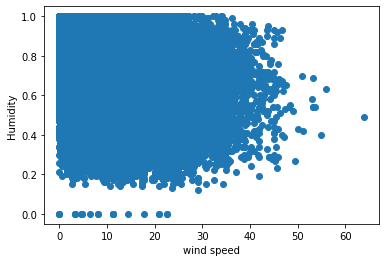

In [10]:
#redesigning the model using different features
import matplotlib.pyplot as plt
plt.scatter(data['Wind Speed (km/h)'], data['Humidity'])
plt.xlabel('wind speed')
plt.ylabel('Humidity')
plt.show()


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data['Wind Speed (km/h)'], data['Humidity'], test_size=0.2)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.values.reshape(-1, 1))
X_test = scaler.transform(X_test.values.reshape(-1, 1))

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [12]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R-squared:', r2)

Mean Squared Error: 0.036521489814266686
Root Mean Squared Error: 0.19110596488405768
R-squared: 0.05194587358450098


In [13]:
new_data = pd.DataFrame({'Wind Speed (km/h)': [14.1197, 25, 30]})
new_data_scaled = scaler.transform(new_data.values.reshape(-1, 1))
new_humidity = model.predict(new_data_scaled)
print('Predicted humidity:', new_humidity)

Predicted humidity: [0.71393494 0.64495478 0.61325521]
